# Лабораторная работа №5

Вариант 1

## Цель работы
- изучение принципов построения информационных систем с использованием логических методов классификации.

## Задачи
- освоение технологии внедрения алгоритмов на онове решающих списков в приложения;
- освоение технологии внедрения алгоритмов на онове решающих деревьев в приложения;
- изучение параметров логической классификации;
- освоение модификаций логических методов классификации.

In [1]:
import pandas as pd

file_path = './transfusion.data'

column_names = ['R', 'F', 'M', 'T']

df = pd.read_csv(file_path, names=column_names, na_values="?")
df.head(10)


,R,F,M,T
2,50,12500,98,1
0,13,3250,28,1
1,16,4000,35,1
2,20,5000,45,1
1,24,6000,77,0
4,4,1000,4,0
2,7,1750,14,1
1,12,3000,35,0
2,9,2250,22,1
5,46,11500,98,1


In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Разделяем данные на признаки (X) и целевую переменную (y)
X = pd.get_dummies(df.drop(['T'], axis=1))
y = df['T']

# Разбиваем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Создаем и обучаем модель регрессии
tree = DecisionTreeRegressor(max_depth=3, random_state=21, max_features=2)
tree.fit(X_train, y_train)

# Делаем предсказания
y_pred = tree.predict(X_test)

# Оцениваем модель, например, с помощью среднеквадратичной ошибки (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка модели: {mse:.2f}")




Среднеквадратичная ошибка модели: 0.16


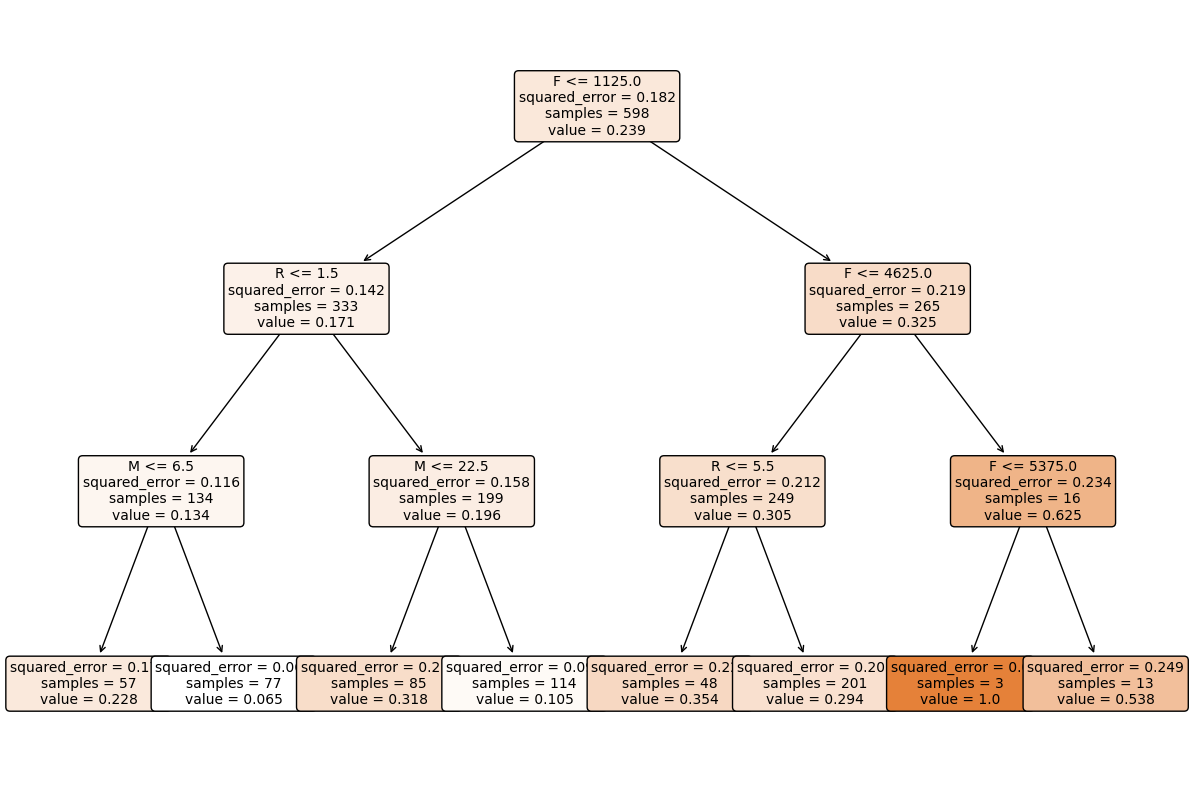

In [3]:
# Визуализация дерева решений

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=y.unique(), rounded=True, fontsize=10)
plt.show()

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Значения max_depth
max_depth_values = [3, 5, 7, 10, None]

# Список для сохранения оценок кросс-валидации
cv_scores_depth = []

# Проходим по значениям max_depth
for depth in max_depth_values:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=21)
    scores = cross_val_score(tree, X, y, cv=5, scoring='neg_mean_squared_error')  # используем MSE в качестве метрики
    cv_scores_depth.append(-scores.mean())

# Теперь у вас есть список с оценками для каждого значения max_depth


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Значения max_features
max_features_values = [2, 4, 6, 8, 'sqrt', 'log2', None]

# Список для сохранения оценок кросс-валидации
cv_scores_features = []

# Проходим по значениям max_features
for features in max_features_values:
    tree = DecisionTreeRegressor(max_depth=5, random_state=21, max_features=features)
    scores = cross_val_score(tree, X, y, cv=5, scoring='neg_mean_squared_error')  # используем отрицательное MSE в качестве метрики
    cv_scores_features.append(-scores.mean())

# Теперь у вас есть список с оценками для каждого значения max_features


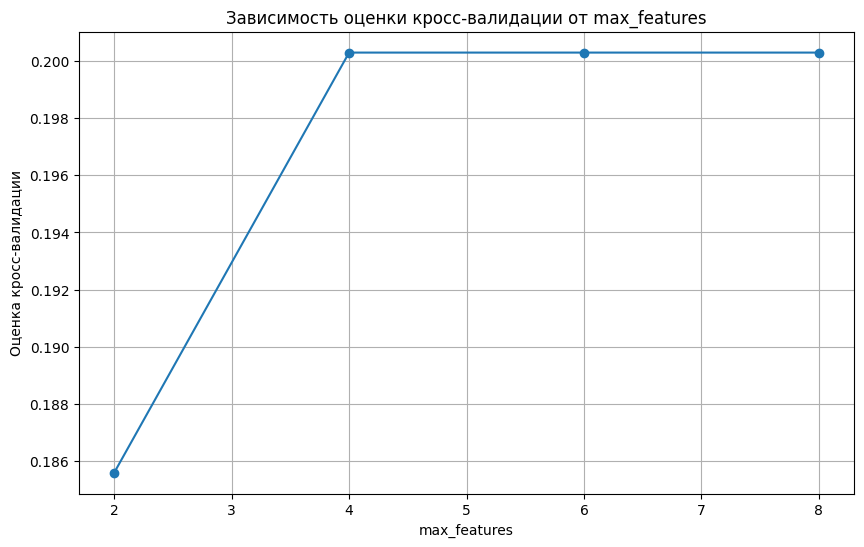

In [18]:
import matplotlib.pyplot as plt

# Убираем строковые значения из max_features_values
max_features_values = [val for val in max_features_values if isinstance(val, (int, float))]

# Убираем соответствующие значения из cv_scores_features
cv_scores_features = cv_scores_features[:len(max_features_values)]

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(max_features_values, cv_scores_features, marker='o')
plt.title('Зависимость оценки кросс-валидации от max_features')
plt.xlabel('max_features')
plt.ylabel('Оценка кросс-валидации')
plt.grid(True)
plt.show()


In [19]:
# Находим индекс максимального значения оценки кросс-валидации для max_depth
import numpy as np

optimal_depth_index = np.argmax(cv_scores_depth)
optimal_depth = max_depth_values[optimal_depth_index]
print(f'Оптимальная глубина дерева (max_depth): {optimal_depth}')

# Находим индекс максимального значения оценки кросс-валидации для max_features
optimal_features_index = np.argmax(cv_scores_features)
optimal_features = max_features_values[optimal_features_index]
print(f'Оптимальное количество признаков (max_features): {optimal_features}')


Оптимальная глубина дерева (max_depth): None
Оптимальное количество признаков (max_features): 4


In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Создаем и обучаем модель регрессии
final_tree = DecisionTreeRegressor(max_depth=optimal_depth, random_state=21, max_features=optimal_features)
final_tree.fit(X, y)

# Делаем предсказания на тестовом наборе данных
y_final_pred = final_tree.predict(X_test)

# Оцениваем модель, например, с использованием среднеквадратичной ошибки (MSE)
final_mse = mean_squared_error(y_test, y_final_pred)
print(f"Среднеквадратичная ошибка окончательной модели: {final_mse:.2f}")


Среднеквадратичная ошибка окончательной модели: 0.07


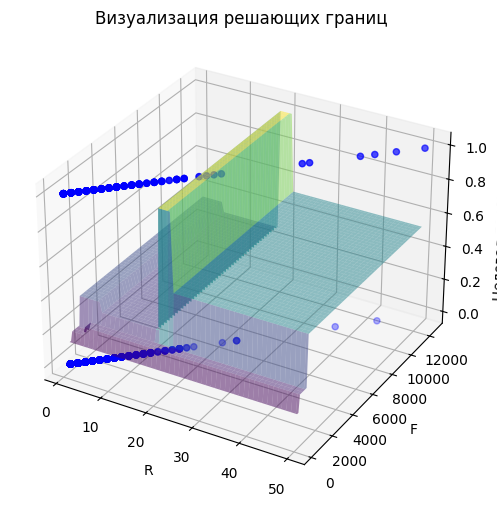

In [21]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Создаем матрицу признаков для обучения (возьмем первые два признака для простоты)
X_train_subset = X_train.iloc[:, :2].values

# Создаем и обучаем модель
tree = DecisionTreeRegressor(max_depth=3, random_state=21)
tree.fit(X_train_subset, y_train)

# Создаем сетку точек для визуализации
x1 = np.linspace(X_train_subset[:, 0].min(), X_train_subset[:, 0].max(), 100)
x2 = np.linspace(X_train_subset[:, 1].min(), X_train_subset[:, 1].max(), 100)
x1, x2 = np.meshgrid(x1, x2)
X_grid = np.c_[x1.ravel(), x2.ravel()]
y_grid = tree.predict(X_grid)
y_grid = y_grid.reshape(x1.shape)

# Визуализируем решающие границы
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_subset[:, 0], X_train_subset[:, 1], y_train, c='b', marker='o', label='Обучающие данные')
ax.plot_surface(x1, x2, y_grid, alpha=0.5, cmap='viridis')
ax.set_xlabel(X_train.columns[0])
ax.set_ylabel(X_train.columns[1])
ax.set_zlabel('Целевая переменная')
plt.title('Визуализация решающих границ')
plt.show()


## Контрольные вопросы

### Поясните принцип построения дерева решений.
- Дерево решений строится с использованием принципа жадной максимизации прироста информации. В начале процесса все данные находятся в корне дерева, а затем при каждом разделении выбирается признак и порог, которые максимизируют прирост информации. Данный процесс повторяется рекурсивно для каждого поддерева, пока не выполнится критерий остановки (например, достигнута максимальная глубина дерева или число объектов в узле меньше определенного порога).

### Укажите статистическое определение информативности.
- Статистическое определение информативности основывается на измерении "чистоты" узла, которая может быть определена разными способами в зависимости от задачи. Например, для задач классификации это может быть доля объектов основного класса в узле.

### Поясните энтропийное определение информативности.
- Энтропийное определение информативности использует меру энтропии, которая измеряет степень хаоса или неопределенности в системе. Чем выше энтропия, тем менее информативен узел. Формула энтропии для узла: ![Формула](./img/formula.png), где с - количество классов, pi - доля объектов в i узле

### Что такое многоклассовая информативность? Для чего она применяется?
- Многоклассовая информативность применяется в задачах, где число классов больше двух. Она может быть определена, например, с использованием критерия Джини или энтропии. Применение многоклассовой информативности позволяет строить деревья решений для задач с более чем двумя классами.

### Поясните назначение и алгоритм бинаризации количественных признаков.
- Бинаризация количественных признаков нужна для того, чтобы преобразовать их в категориальные. Алгоритм заключается в выборе порога, который наилучшим образом разделяет данные на две категории.

### Поясните порядок поиска закономерностей в форме конъюнкций.
- Порядок поиска закономерностей в форме конъюнкций заключается в том, чтобы последовательно добавлять предикаты (условия) к правилам, проверяя, как они улучшают качество модели.